In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
covid_df = pd.read_csv("BDM_p2\covid19_dataset_extensive.csv",parse_dates=["Last_Update"])

In [3]:
covid_df.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
0,45001.0,Abbeville,South Carolina,US,2020-07-13 04:43:04,34.223334,-82.461707,153,1,0,152.0,"Abbeville, South Carolina, US",623.802340,0.653595
1,22001.0,Acadia,Louisiana,US,2020-07-13 04:43:04,30.295065,-92.414197,1339,45,0,1294.0,"Acadia, Louisiana, US",2158.111048,3.360717
2,51001.0,Accomack,Virginia,US,2020-07-13 04:43:04,37.767072,-75.632346,1042,14,0,1028.0,"Accomack, Virginia, US",3224.408962,1.343570
3,16001.0,Ada,Idaho,US,2020-07-13 04:43:04,43.452658,-116.241552,4146,25,0,4121.0,"Ada, Idaho, US",860.903637,0.602991
4,19001.0,Adair,Iowa,US,2020-07-13 04:43:04,41.330756,-94.471059,17,0,0,17.0,"Adair, Iowa, US",237.695749,0.000000


In [4]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3813 entries, 0 to 3812
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   FIPS                 3131 non-null   float64       
 1   Admin2               3135 non-null   object        
 2   Province_State       3644 non-null   object        
 3   Country_Region       3813 non-null   object        
 4   Last_Update          3813 non-null   datetime64[ns]
 5   Lat                  3739 non-null   float64       
 6   Long_                3739 non-null   float64       
 7   Confirmed            3813 non-null   int64         
 8   Deaths               3813 non-null   int64         
 9   Recovered            3813 non-null   int64         
 10  Active               3809 non-null   float64       
 11  Combined_Key         3813 non-null   object        
 12  Incidence_Rate       3739 non-null   float64       
 13  Case-Fatality_Ratio  3762 non-nul

In [5]:
covid_df.isnull().sum()

FIPS                   682
Admin2                 678
Province_State         169
Country_Region           0
Last_Update              0
Lat                     74
Long_                   74
Confirmed                0
Deaths                   0
Recovered                0
Active                   4
Combined_Key             0
Incidence_Rate          74
Case-Fatality_Ratio     51
dtype: int64

In [6]:
grouped_data = covid_df.groupby('Country_Region')['Confirmed', 'Deaths', 'Recovered', 'Active', 'Incidence_Rate','Case-Fatality_Ratio'].sum().reset_index()

C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [7]:
grouped_data.head()

,Country_Region,Confirmed,Deaths,Recovered,Active,Incidence_Rate,Case-Fatality_Ratio
0,Afghanistan,34451,1010,21216,12225.0,88.498505,2.931700
1,Albania,3454,93,1946,1415.0,120.022239,2.692530
2,Algeria,19195,1011,13743,4441.0,43.773189,5.266997
3,Andorra,855,52,803,0.0,1106.581246,6.081871
4,Angola,506,26,118,362.0,1.539572,5.138340


In [8]:
save_grouped_df= pd.DataFrame(grouped_data).to_csv('grouped_data_13July.csv')

PermissionError: [Errno 13] Permission denied: 'grouped_data_13July.csv'

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
from sklearn.datasets.samples_generator import make_blobs

In [ ]:
grouped_data["Confirmed"]=grouped_data["Confirmed"].astype("float64")

In [ ]:
grouped_data["Deaths"]=grouped_data["Deaths"].astype("float64")

In [ ]:
grouped_data["Recovered"]=grouped_data["Recovered"].astype("float64")

In [ ]:
grouped_data.info()

In [ ]:
df = pd.DataFrame(grouped_data, columns=['Confirmed','Deaths','Recovered','Active','Incidence_Rate','Case-Fatality_Ratio'])

In [ ]:
kmeans = KMeans(n_clusters=3).fit(df)
centroids = kmeans.cluster_centers_
print(centroids)

In [ ]:
wcss = []
for i in range(1, 6):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=3813, n_init=10, random_state=0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 6), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
features = ['Confirmed','Deaths','Recovered','Active','Incidence_Rate','Case-Fatality_Ratio']
# Separating out the features
x = grouped_data.loc[:, features].values
# Separating out the target
y = grouped_data.loc[:,['Country_Region']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [ ]:
finalDf = pd.concat([principalDf, grouped_data[['Country_Region']]], axis = 1)

In [ ]:
finalDf.head()

In [ ]:
pca.explained_variance_ratio_

In [ ]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
principalDf2 = pd.DataFrame(data = principalComponents
             , columns = ['PC_1', 'PC_2', 'PC_3'])

In [ ]:
finalDf = pd.concat([principalDf2, grouped_data[['Country_Region']]], axis = 1)

In [ ]:
finalDf.head()

In [ ]:
finalDf.describe()

In [ ]:
len(finalDf)

In [9]:
finalDf_feat = pd.DataFrame(finalDf, columns=['PC_1', 'PC_2', 'PC_3'])

NameError: name 'finalDf' is not defined

In [10]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(finalDf_feat)
    distortions.append(kmeanModel.inertia_)

NameError: name 'KMeans' is not defined

ValueError: x and y must have same first dimension, but have shapes (9,) and (0,)

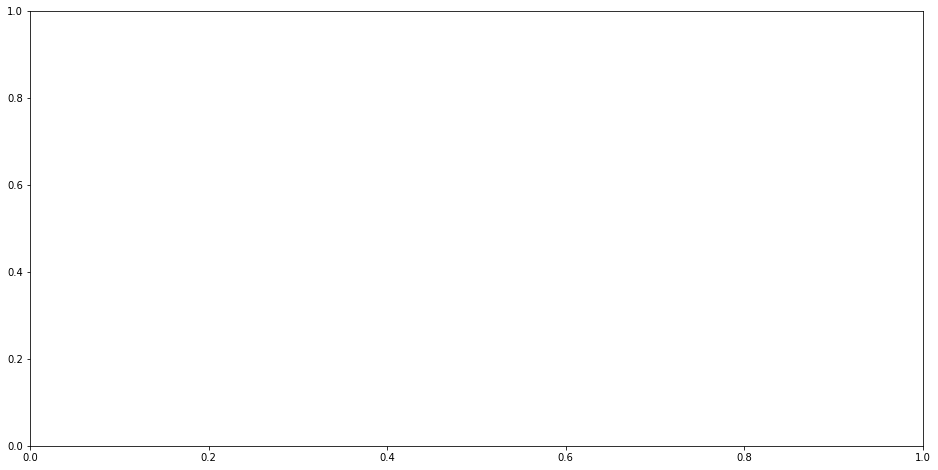

In [11]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [12]:
kmeanModel = KMeans(n_clusters=3)
kmeanModel.fit(finalDf_feat)

NameError: name 'KMeans' is not defined

In [13]:
import scipy.cluster.hierarchy as sch

In [14]:
dendrogram = sch.dendrogram(sch.linkage(df, method  = "ward"))
plt.figure(figsize=(16,8))
plt.title('Dendrogram')
plt.xlabel('Country_Region')
plt.ylabel('Euclidean distances')
plt.show()

NameError: name 'df' is not defined

In [ ]:
from sklearn.cluster import AgglomerativeClustering 
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage ='ward')

In [ ]:
#y_hc=hc.fit_predict(df)
hc.fit(df)
labels = hc.labels_

In [15]:
plt.scatter(df[labels==0, 0], df[labels==0, 1], s=50, marker='o', color='red')
plt.scatter(df[labels==1, 0], df[labels==1, 1], s=50, marker='o', color='blue')
plt.scatter(df[labels==2, 0], df[labels==2, 1], s=50, marker='o', color='green')

NameError: name 'df' is not defined

In [16]:
df.head()

NameError: name 'df' is not defined

In [17]:
grouped_data.head()
  

,Country_Region,Confirmed,Deaths,Recovered,Active,Incidence_Rate,Case-Fatality_Ratio
0,Afghanistan,34451,1010,21216,12225.0,88.498505,2.931700
1,Albania,3454,93,1946,1415.0,120.022239,2.692530
2,Algeria,19195,1011,13743,4441.0,43.773189,5.266997
3,Andorra,855,52,803,0.0,1106.581246,6.081871
4,Angola,506,26,118,362.0,1.539572,5.138340


In [18]:
grouped_data.sort_values(["Confirmed"], axis=0, 
                 ascending=False, inplace=True) 

In [19]:
grouped_data.head()

,Country_Region,Confirmed,Deaths,Recovered,Active,Incidence_Rate,Case-Fatality_Ratio
174,US,3304942,135205,1006326,2208772.0,2.027605e+06,10546.526615
23,Brazil,1864681,72100,1264843,527738.0,3.511238e+04,82.765642
79,India,878254,23174,553471,301609.0,2.730168e+03,44.519569
140,Russia,726036,11318,500208,214510.0,3.776617e+04,90.606512
134,Peru,326326,11870,217111,97345.0,1.875724e+04,84.934502


In [20]:
gd_30 = grouped_data.head(30)
xyz=gd_30.to_csv("top_30.csv")

PermissionError: [Errno 13] Permission denied: 'top_30.csv'

In [21]:
gd_30.reset_index()

,index,Country_Region,Confirmed,Deaths,Recovered,Active,Incidence_Rate,Case-Fatality_Ratio
0,174,US,3304942,135205,1006326,2208772.0,2.027605e+06,10546.526615
1,23,Brazil,1864681,72100,1264843,527738.0,3.511238e+04,82.765642
2,79,India,878254,23174,553471,301609.0,2.730168e+03,44.519569
3,140,Russia,726036,11318,500208,214510.0,3.776617e+04,90.606512
4,134,Peru,326326,11870,217111,97345.0,1.875724e+04,84.934502
5,35,Chile,315041,6979,283902,24160.0,1.501846e+04,20.571902
6,113,Mexico,299750,35006,234905,29839.0,7.244229e+03,360.251745
7,178,United Kingdom,291154,44904,1378,244872.0,4.254779e+03,94.203209
8,156,South Africa,276242,4079,134874,137289.0,4.657699e+02,1.476604
9,81,Iran,257303,12829,219993,24481.0,3.063388e+02,4.985950


In [22]:
df_30 = pd.DataFrame(gd_30, columns=['Confirmed','Deaths','Recovered','Active','Incidence_Rate','Case-Fatality_Ratio'])

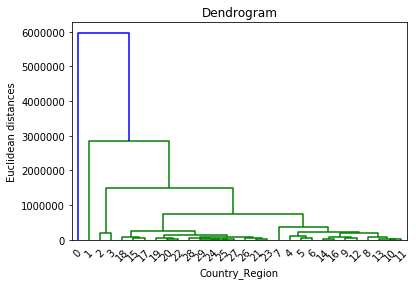

In [23]:
dendrogram = sch.dendrogram(sch.linkage(df_30, method  = "ward"))
#plt.figure(figsize=(16,8))
plt.title('Dendrogram')
plt.xlabel('Country_Region')
plt.ylabel('Euclidean distances')
plt.show()

In [24]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(df_30)

array([3, 2, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [25]:
print(cluster.labels_)

[3 2 4 4 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [26]:
agglomerative = pd.DataFrame(cluster.labels_)

In [27]:
agglomerative.head()

,0
0,3
1,2
2,4
3,4
4,0


In [28]:
df_30.insert((df_30.shape[1]),'agglomerative',agglomerative)

In [29]:
df_30.head()

,Confirmed,Deaths,Recovered,Active,Incidence_Rate,Case-Fatality_Ratio,agglomerative
174,3304942,135205,1006326,2208772.0,2.027605e+06,10546.526615,NaN
23,1864681,72100,1264843,527738.0,3.511238e+04,82.765642,1.0
79,878254,23174,553471,301609.0,2.730168e+03,44.519569,NaN
140,726036,11318,500208,214510.0,3.776617e+04,90.606512,NaN
134,326326,11870,217111,97345.0,1.875724e+04,84.934502,NaN


In [30]:
df_30.tail()

,Confirmed,Deaths,Recovered,Active,Incidence_Rate,Case-Fatality_Ratio,agglomerative
80,75699,3606,35638,36455.0,27.675489,4.763603,NaN
162,74898,5526,0,69372.0,13657.741773,135.680241,NaN
52,67870,5047,30283,32540.0,384.683836,7.436275,NaN
15,64932,464,55380,9088.0,687.160485,0.714594,1.0
16,62707,9782,17196,35729.0,541.061930,15.599534,0.0


In [31]:
del df_30['agglomerative']

In [32]:
df_30.head()

,Confirmed,Deaths,Recovered,Active,Incidence_Rate,Case-Fatality_Ratio
174,3304942,135205,1006326,2208772.0,2.027605e+06,10546.526615
23,1864681,72100,1264843,527738.0,3.511238e+04,82.765642
79,878254,23174,553471,301609.0,2.730168e+03,44.519569
140,726036,11318,500208,214510.0,3.776617e+04,90.606512
134,326326,11870,217111,97345.0,1.875724e+04,84.934502


In [33]:
df_30_proper = pd.DataFrame(gd_30, columns=['Confirmed','Deaths','Recovered','Active'])
mno=df_30_proper.to_csv("new_top_30.csv")

PermissionError: [Errno 13] Permission denied: 'new_top_30.csv'

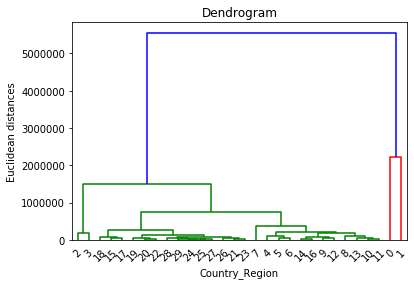

In [34]:
dendrogram = sch.dendrogram(sch.linkage(df_30_proper, method  = "ward"))
#plt.figure(figsize=(16,8))
plt.title('Dendrogram')
plt.xlabel('Country_Region')
plt.ylabel('Euclidean distances')
plt.show()

In [35]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df_30_proper)
    distortions.append(kmeanModel.inertia_)

NameError: name 'KMeans' is not defined

ValueError: x and y must have same first dimension, but have shapes (9,) and (0,)

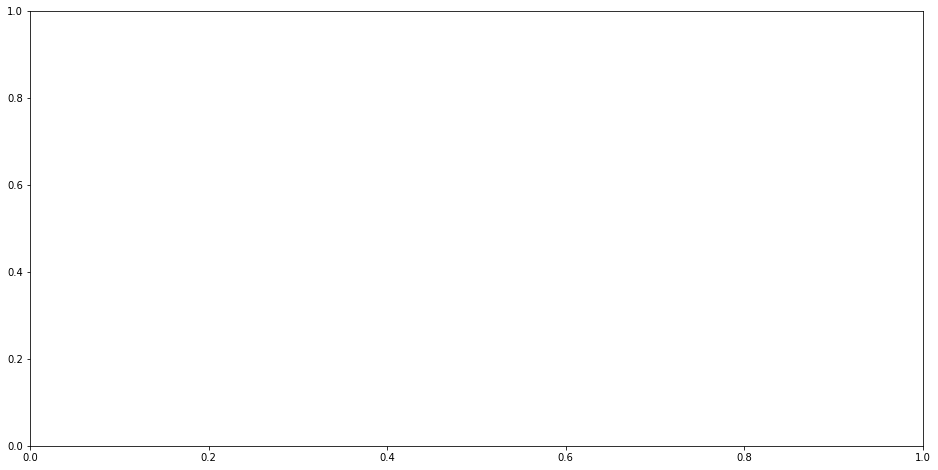

In [36]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [37]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster.fit_predict(df_30_proper)
agglomerative = pd.DataFrame(cluster.labels_)
df_30_proper.insert((df_30_proper.shape[1]),'agglomerative',agglomerative)
#centroids = kmeans.cluster_centers_
#df_30_proper.head()
print(cluster.labels_)

[2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(df_30_proper.iloc[:,0], df_30_proper.iloc[:,1], c=agglomerative[0], cmap='rainbow', s=75)
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=30)

In [ ]:
covid_ratios = pd.read_csv("BDM_p2\covid19_dataset_extensive.csv",parse_dates=["Last_Update"])

In [ ]:
#pip install sklearn

In [ ]:
len(covid_ratios)

In [ ]:
covid_ratios.isnull().sum()

In [ ]:
covid_ratios.head()

In [ ]:
grp_ratio = covid_ratios.groupby('Country_Region')['Incidence_Rate','Case-Fatality_Ratio'].mean().reset_index()

In [ ]:
grp_ratio.head()

In [ ]:
grp_ratio.sort_values(["Incidence_Rate"], axis=0, 
                 ascending=False, inplace=True) 

In [ ]:
grp_ratio.head()

In [ ]:
len(grp_ratio)

In [ ]:
df_ratio = pd.DataFrame(grp_ratio, columns=['Incidence_Rate','Case-Fatality_Ratio'])

In [ ]:
df_ratio.head()

In [ ]:
df_ratio.info()

In [ ]:
df_ratio.dropna()

In [ ]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster.fit_predict(df_ratio)